In [50]:
# Import required libraries
import os
from googleapiclient.discovery import build
import pandas as pd



In [51]:
# Retrieve YouTube API Key from environment variable
API_KEY = os.getenv("you_tube_api")  # Ensure you have set your environment variable

# Set up YouTube API client
youtube = build("youtube", "v3", developerKey=API_KEY)

# Define search queries focused on Abercrombie fashion content
search_queries = [
    "Abercrombie & Fitch haul", "Abercrombie try-on", "Abercrombie jeans review","curve love","abercrombie","Abercrombie",
    "Abercrombie fall fashion", "Abercrombie winter outfits", "Abercrombie shopping haul"
]




In [52]:
# Define keywords to EXCLUDE (CEO scandals, legal issues)
exclude_keywords = ["CEO", "scandal", "charged", "arrested", "indicted", "trafficking", "lawsuit"]

# Initialize an empty list to store video data
video_data = []

# Loop through each search query to fetch relevant videos
for query in search_queries:
    search_response = youtube.search().list(
        q=query,
        type="video",
        part="id,snippet",
        maxResults=100,
        publishedAfter='2020-01-01T00:00:00Z',   # Add or update this line
        publishedBefore='2025-01-01T00:00:00Z'  # Add or update this line
).execute()
    video_data.append(search_response)

   

In [53]:
all_video_ids = []


for search_response in video_data:
      

    # Extract video IDs
    video_ids = [item["id"]["videoId"] for item in search_response["items"]]
    all_video_ids += video_ids
    # Fetch video statistics
all_video_stat = []
for i  in range(len(all_video_ids)//):
    videos_subset = all_video_ids[i * 50:(i+1) * 50]

    video_stats = youtube.videos().list(
        part="snippet,statistics",
        id=",".join(videos_subset)
    ).execute()

    all_video_stat += video_stats

    # Store only videos that do NOT contain exclusion words
for video in all_video_stat["items"]:
        title = video["snippet"]["title"]
        if not any(excluded in title.lower() for excluded in exclude_keywords):  # Exclude irrelevant topics
            video_data.append({
                "Title": title,
                "Views": int(video["statistics"].get("viewCount", 0)),
                "Likes": int(video["statistics"].get("likeCount", 0)),
                "Comments": int(video["statistics"].get("commentCount", 0)),
                "Published Date": video["snippet"]["publishedAt"],
                "Video ID": video["id"]
            })


TypeError: list indices must be integers or slices, not str

In [54]:
all_video_stat 

['kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo',
 'kind',
 'etag',
 'items',
 'pageInfo']

In [ ]:

# Store the data in a DataFrame
df = pd.DataFrame(video_data)

# Print the refined dataset
print(df)

# Save the filtered data for analysis
df.to_csv("youtube_data2.csv", index=False)

                          kind                         etag nextPageToken  \
0   youtube#searchListResponse  TIL5D25gWnRSyXBQj-FGjZbbMOM        CDIQAA   
1   youtube#searchListResponse  lkxcKb8A0fZqRAjou5iOVTP00rI        CDIQAA   
2   youtube#searchListResponse  h8ms541nAA0ynSxpn_yTVXzSsWI        CDIQAA   
3   youtube#searchListResponse  RyBVrT3tzgwGe0NfgnW0-zrG1Gw        CDIQAA   
4   youtube#searchListResponse  0fpxoglHxXOXVTyq_9BdcFVCkNo        CDIQAA   
5   youtube#searchListResponse  iNX7bSIkHEN3XUfWm-ZSl0LRrBY        CDIQAA   
6   youtube#searchListResponse  AMrYaQzF3yVm7Xw3FUC6pvkcHFA        CDIQAA   
7   youtube#searchListResponse  67B5GyneCtMQAGBm2oPoZEqQI_I        CDIQAA   
8   youtube#searchListResponse  zzf8NDSm465fJQyTY6oaxLKVm8s        CDIQAA   
9                          NaN                          NaN           NaN   
10                         NaN                          NaN           NaN   
11                         NaN                          NaN           NaN   

In [43]:
df.shape

(59, 12)

In [44]:
import matplotlib.pylab as plt
import seaborn as sns

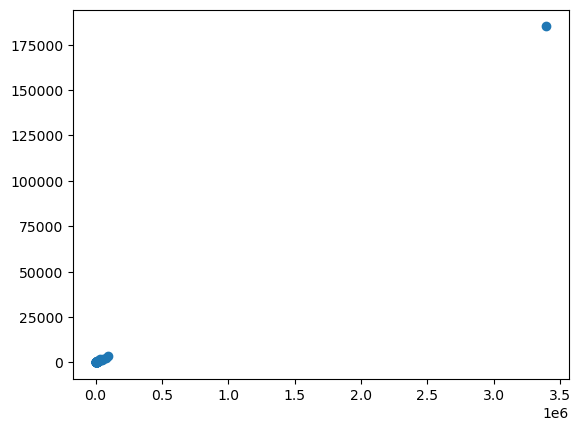

In [ ]:
plt.scatter(x = "Views" , y = "Likes" , data=df )

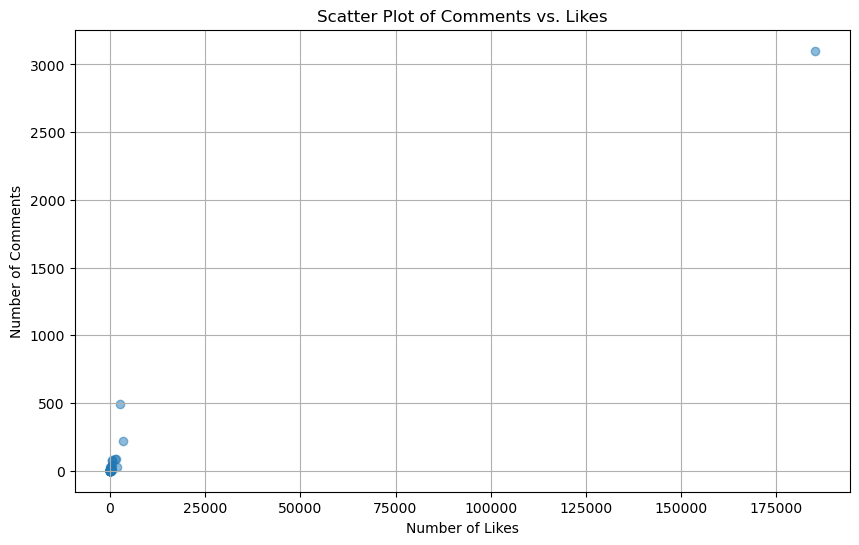

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization (optional)
plt.scatter(df['Likes'], df['Comments'], alpha=0.5)  # 'alpha' adds transparency

#Add labels and title
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot of Comments vs. Likes')

#Add grid lines for better readability (optional)
plt.grid(True)

#Show the plot
plt.show()

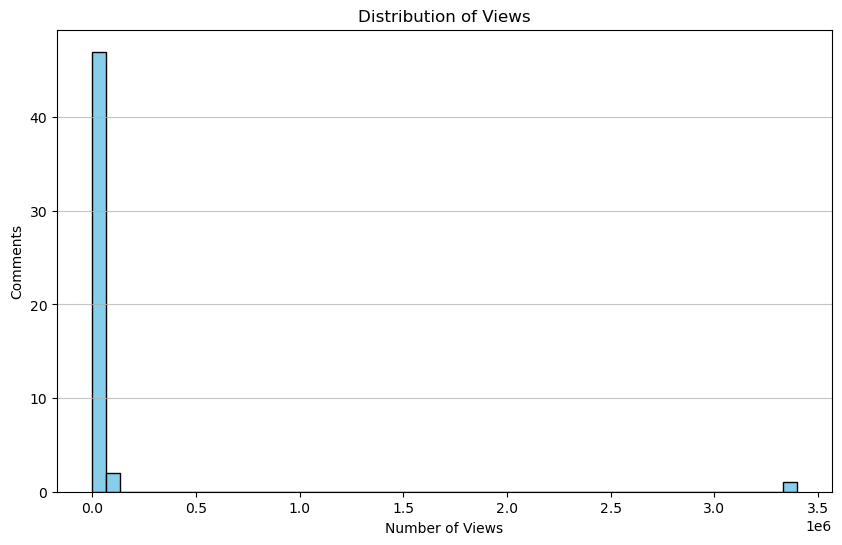

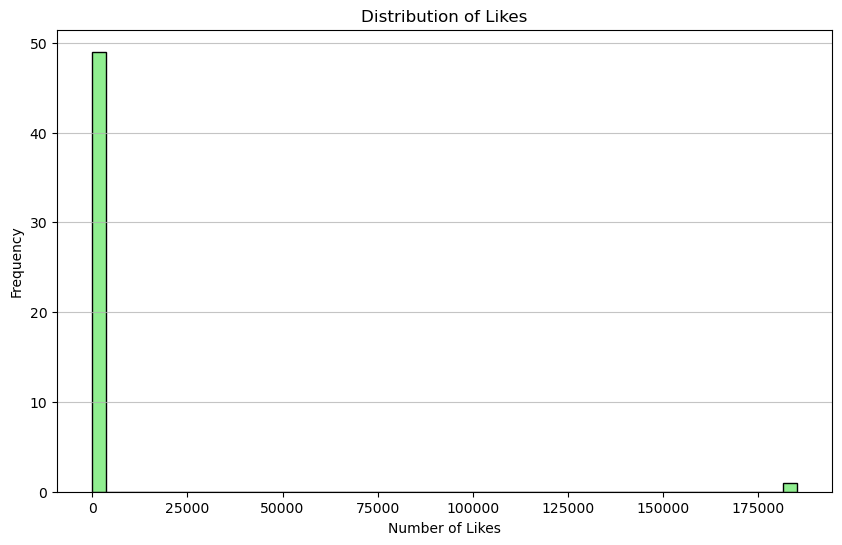

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Views'], bins=50, color='skyblue', edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Number of Views')
plt.ylabel('Comments')
plt.title('Distribution of Views')
plt.grid(axis='y', alpha=0.75)
plt.show()

#Histogram of Likes
plt.figure(figsize=(10, 6))
plt.hist(df['Likes'], bins=50, color='lightgreen', edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [48]:



# Convert 'Published Date' to datetime and keep only the date
df["Published Date"] = pd.to_datetime(df["Published Date"]).dt.date

# Aggregate YouTube data by date (sum Views, Likes, and Comments for the same date)
youtube_summary = df.groupby("Published Date").agg({
    "Views": "sum",
    "Likes": "sum",
    "Comments": "sum"
}).reset_index()

# Convert back to datetime for merging
youtube_summary["Published Date"] = pd.to_datetime(youtube_summary["Published Date"])

# Display processed YouTube dataset
print(youtube_summary.head())


  Published Date   Views  Likes  Comments
0     2020-05-22  5093.0   48.0      11.0
1     2020-07-09  1176.0   21.0      24.0
2     2020-07-14    99.0    2.0       0.0
3     2022-01-06   680.0   26.0       2.0
4     2022-02-27   312.0   24.0       4.0


In [49]:
youtube_summary.shape

(47, 4)